# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a suburb or town in a Boston. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.

* Blanks '_______' are provided in the notebook that needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# Fill in the blank" or "# Complete the code". Running incomplete code may throw an error.
* Remove the blank and state your observations in detail wherever the mark down says 'Write your observations here:_________'
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [ ]:
df = pd.read_csv("Boston.csv") ## Complete the code

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Write your observations here:___________**

No immediate missing values are visible in the first few rows.
All data values appear numeric, making the dataset ready for numerical and statistical operations.

### **Data Overview**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
df.shape   # Complete the code

(506, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**

- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**.

In [ ]:
df.duplicated().sum() ## Complete the code to check duplicate entries in the data

0

### **Summary Statistics of this Dataset**

In [ ]:
df.describe() ## Complete the code to print the statistical summary of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Write your observations here:___________**
CRIM (Per capita crime rate by town):

The average crime rate is 3.61, but the maximum is quite high at 88.98, indicating some towns have significantly higher crime rates.
The median (0.256) and 75th percentile (3.677) show that most values are much lower than the mean, suggesting a skewed distribution.
ZN (Proportion of residential land zoned for lots over 25,000 sq.ft.):

Many towns have no zoning for large lots (median is 0.0, and 25th percentile is also 0.0).
Some towns have a significant portion zoned for large lots, as the maximum is 100%.
INDUS (Proportion of non-retail business acres per town):

The average proportion of industrial areas is 11.13%.
The distribution shows a range from 0.46 to 27.74, with a relatively low standard deviation.
CHAS (Charles River dummy variable):

Only a small fraction of towns are near the Charles River (mean=0.069, suggesting only ~7% are near the river).
NOX (Nitric oxide concentration):

The average NOX concentration is 0.55, with values ranging from 0.385 to 0.871. This indicates some level of variation in air quality across towns.
RM (Average number of rooms per dwelling):

The average number of rooms is 6.28, and the range is from 3.56 to 8.78.
This feature appears to have a relatively normal distribution.
AGE (Proportion of owner-occupied units built before 1940):

On average, 68.57% of houses in a town are old (built before 1940).
Some towns have exclusively older homes (max=100).
DIS (Weighted distances to five Boston employment centers):

The average distance is 3.79, with a wide range from 1.13 to 12.13, indicating significant variation in accessibility.
RAD (Index of accessibility to radial highways):

The RAD index has a wide range, with a maximum value of 24.
The high standard deviation (8.7) indicates considerable variability among towns.
TAX (Full-value property-tax rate per $10,000):

The property tax rate varies significantly, with a mean of 408.23 and a maximum of 711.
The lower percentiles indicate many towns have lower taxes.
PTRATIO (Pupil-teacher ratio by town):

The pupil-teacher ratio averages at 18.46, with a relatively small range (12.6 to 22.0), indicating similar educational settings across towns.
LSTAT (% lower status of the population):

The proportion of the lower-status population has a mean of 12.65, with a maximum of 37.97.
The relatively high standard deviation (7.14) suggests diversity in socioeconomic conditions.
MEDV (Median value of owner-occupied homes in $1,000):

The median value of homes is $22,532, but the maximum is capped at $50,000, indicating a potential ceiling effect.
The relatively low minimum value ($5,000) suggests a significant disparity in housing prices.
Key Insights:
Features like CRIM, ZN, and LSTAT are highly skewed.
Some variables, like CHAS and RAD, are categorical or heavily clustered.
MEDV (target variable) shows a potential cap at $50,000, which may impact the regression model's predictions.
Further normalization or transformations might be required for features like CRIM and LSTAT due to their skewed distributions.





### Checking for missing values

In [ ]:
df.isnull().sum() ## Complete the code to check duplicate entries in the data

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## **Exploratory Data Analysis and Data Preprocessing**

### **Univariate Analysis**

**Let's check the distribution of the variables**

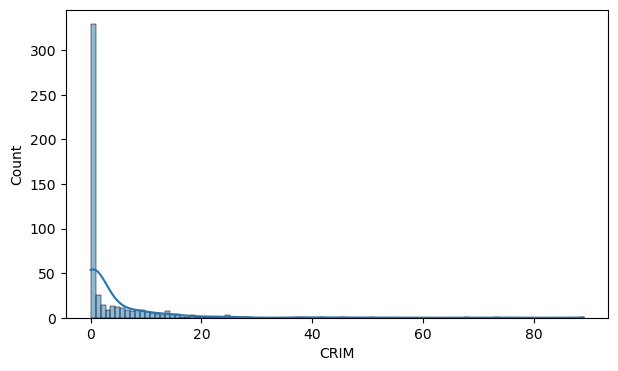

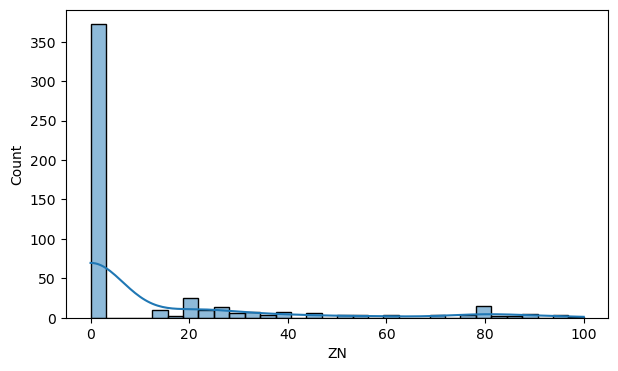

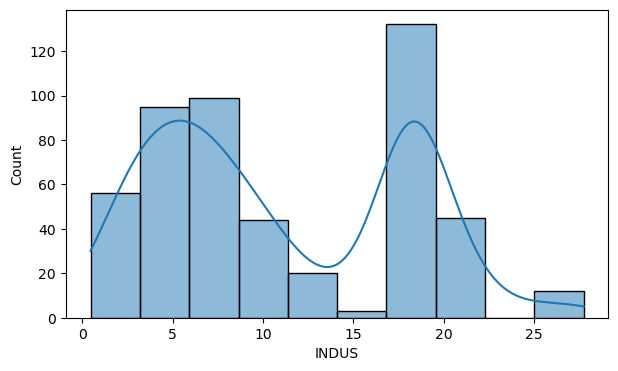

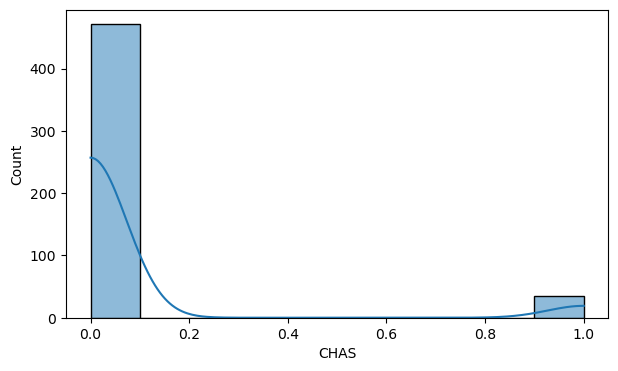

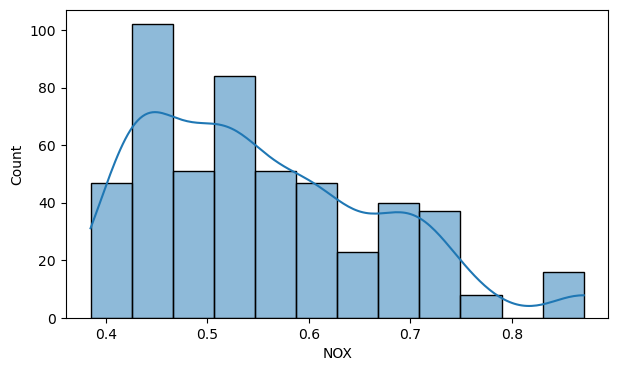

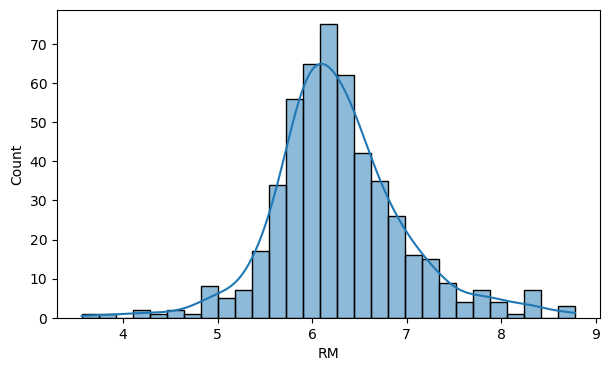

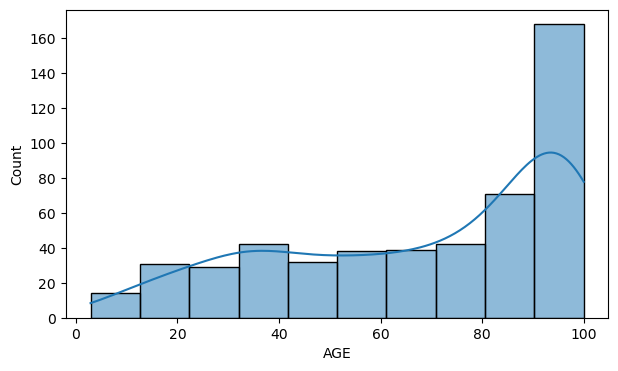

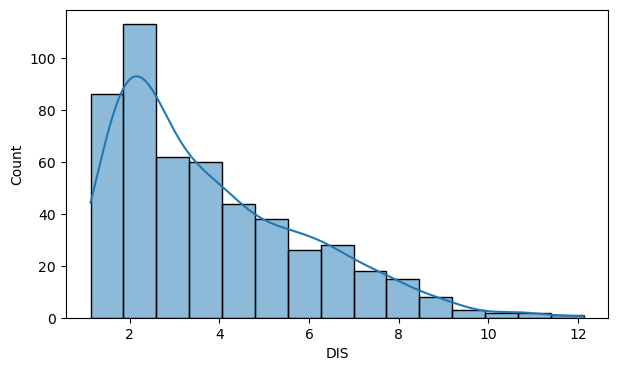

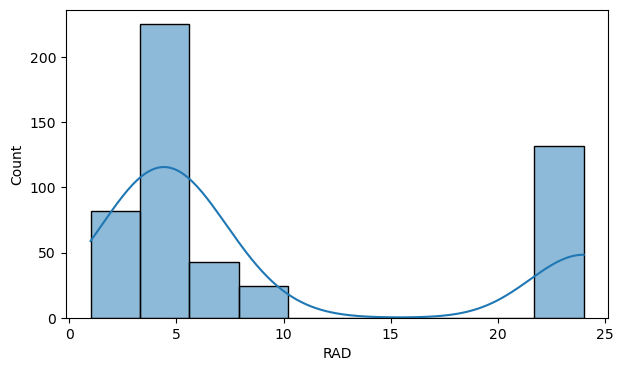

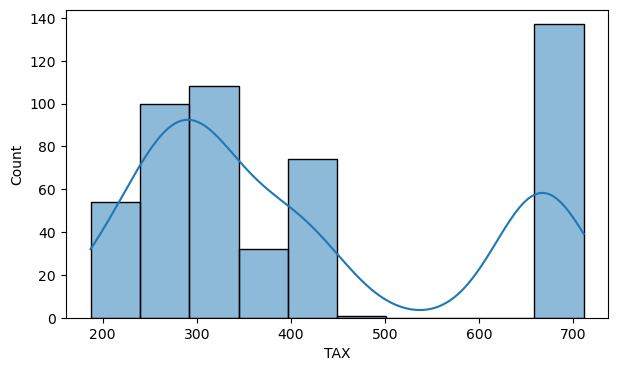

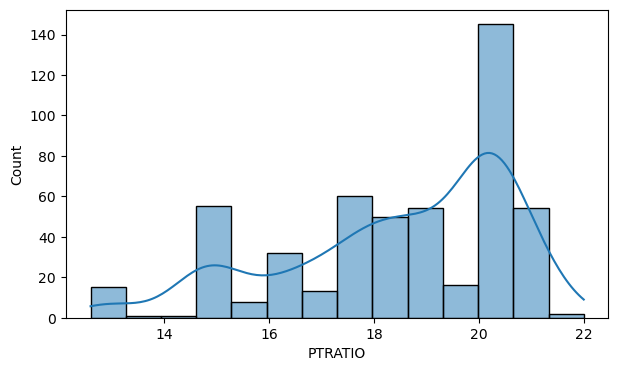

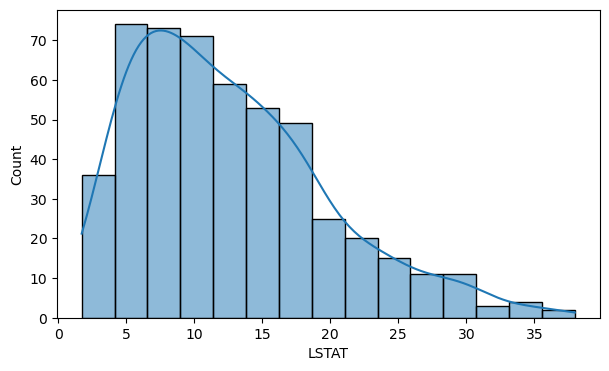

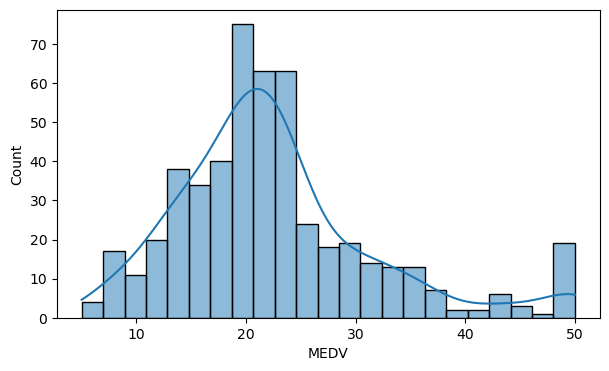

In [ ]:
# Plotting all the columns to look at their distributions
for i in df.columns:

    plt.figure(figsize = (7, 4))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

**Write your observations here:___________**
Detailed Combined Insights
Key Observations and Trends Across All Variables
General Trends in Data Distributions:
Many variables, such as CRIM, ZN, NOX, AGE, and LSTAT, exhibit right-skewed distributions. These variables are concentrated around smaller values with long tails stretching toward higher values. This skewness suggests the presence of a few extreme cases (outliers), which could disproportionately influence model predictions if not addressed.
Variables like RM and MEDV follow more normal or near-normal distributions, making them more suitable for linear modeling without transformation.
Bimodal distributions in variables like INDUS, RAD, and TAX hint at distinct groupings or clusters of towns. For example, some towns may have highly industrialized areas (INDUS), while others are predominantly residential, or some towns may have very high tax rates (TAX), forming distinct subgroups.
Variable-Specific Insights and Their Potential Influence on Housing Prices
CRIM (Per capita crime rate):

Highly skewed with most values close to 0, indicating that the majority of towns have very low crime rates.
A small number of towns have exceptionally high crime rates (above 20 and up to 88), representing outliers that could negatively impact housing prices.
Potential Impact on Housing Prices: Likely a strong negative correlation with MEDV, as higher crime rates typically deter buyers.
Handling Recommendation: Apply log transformation to normalize the skewed distribution and reduce the impact of extreme values.
ZN (Proportion of residential land for large lots):

Majority of towns have a value of 0, meaning they have no zoning for large lots, while higher values (near 100) are sparse and represent outliers.
Potential Impact on Housing Prices: Higher ZN values are likely associated with wealthier areas, where larger plots of land increase home desirability and price.
Handling Recommendation: Consider treating this as a binary feature (e.g., ZN > 0 or ZN = 0) due to the high concentration of zeros, or apply categorical binning for grouped analysis.
INDUS (Proportion of non-retail business land):

The bimodal distribution highlights two types of towns: one with low industrial activity (residential-focused) and another with high industrial presence.
Potential Impact on Housing Prices: Towns with higher INDUS values likely have lower housing prices, as industrial zones may reduce residential desirability.
Handling Recommendation: Incorporate interactions between INDUS and other variables (like CRIM and NOX) to better model effects of industrial development.
CHAS (Proximity to Charles River):

An imbalanced binary variable with very few towns bordering the river (CHAS = 1).
Potential Impact on Housing Prices: Proximity to the river is likely a positive predictor of housing prices, as riverside properties are often more desirable.
Handling Recommendation: Stratify this variable during train-test splits to ensure the rare CHAS = 1 cases are adequately represented in both sets.
NOX (Nitric oxide concentration):

Moderately skewed right, with most towns having concentrations between 0.4 and 0.7.
Potential Impact on Housing Prices: Likely a negative correlation with MEDV, as higher pollution levels reduce the desirability of a town.
Handling Recommendation: Normalize or standardize this variable, as its range (0.38 to 0.87) may disproportionately influence regression coefficients.
RM (Average number of rooms per dwelling):

Normally distributed around 6 rooms, with fewer homes having very low or very high average room counts.
Potential Impact on Housing Prices: Strong positive correlation expected with MEDV, as more rooms generally indicate larger, more expensive homes.
Handling Recommendation: No transformation is needed; use this as a key predictor.
AGE (Proportion of older homes):

Right-skewed, with many towns having nearly all homes built before 1940 (AGE = 100).
Potential Impact on Housing Prices: Could have a negative correlation with MEDV, as older homes may require more maintenance and be less energy-efficient. However, historical or vintage areas could exhibit localized positive effects.
Handling Recommendation: Apply transformation (e.g., square root) to reduce skewness and account for clustering at 100.
DIS (Distance to Boston employment centers):

Moderately right-skewed, with most towns relatively close to employment hubs (1–5 units).
Potential Impact on Housing Prices: Likely a negative correlation with distance, as closer proximity to jobs (lower DIS) often increases desirability.
Handling Recommendation: Apply log transformation to handle the long tail of large distances and emphasize closer towns.
RAD (Access to radial highways):

Bimodal distribution, with peaks around 5 and 24, indicating distinct accessibility levels across towns.
Potential Impact on Housing Prices: Higher RAD values (better highway access) may positively influence MEDV in suburban areas, but excessive accessibility might negatively impact properties due to noise and traffic.
Handling Recommendation: Treat as a categorical variable to capture the inherent grouping.
TAX (Property tax rate per $10,000):

Bimodal distribution, with clusters around 300 and 700.
Potential Impact on Housing Prices: Higher taxes could negatively influence MEDV by increasing ownership costs, though high-tax towns might offer superior public services.
Handling Recommendation: Normalize values and analyze interactions with variables like PTRATIO and LSTAT.
PTRATIO (Pupil-teacher ratio):

Slightly skewed, with most towns having values between 18 and 21.
Potential Impact on Housing Prices: Likely a negative correlation with MEDV, as lower ratios (indicating better school systems) tend to boost property values.
Handling Recommendation: Use directly, as no major transformation is needed.
LSTAT (Lower status population percentage):

Strongly right-skewed, with most towns having a small percentage of lower-status residents.
Potential Impact on Housing Prices: Strong negative correlation expected with MEDV, as socioeconomic status is a key determinant of neighborhood desirability.
Handling Recommendation: Apply log or square root transformation to reduce skewness and improve model performance.
MEDV (Target Variable: Housing Prices):

Slightly left-skewed and capped at 50, limiting the ability to model extreme housing prices.
Potential Handling: Investigate specialized approaches like Tobit regression to address the capping issue, or treat 50 as a separate category in classification tasks.
Modeling Implications
Normalization/Standardization: Variables like CRIM, DIS, NOX, and AGE require scaling or transformation to reduce skewness and stabilize variance for linear regression or other parametric models.

Handling Outliers: Features like CRIM, ZN, and LSTAT contain extreme outliers. Robust scaling or transformations (log, square root) can mitigate their influence.

Feature Engineering:

Treating categorical variables like CHAS and RAD appropriately will improve interpretability.
Introducing interaction terms (e.g., INDUS * NOX or AGE * LSTAT) could capture complex relationships.
Target Variable Capping: The ceiling effect at 50 in MEDV requires attention to avoid biasing predictions, especially for high-value homes.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [ ]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

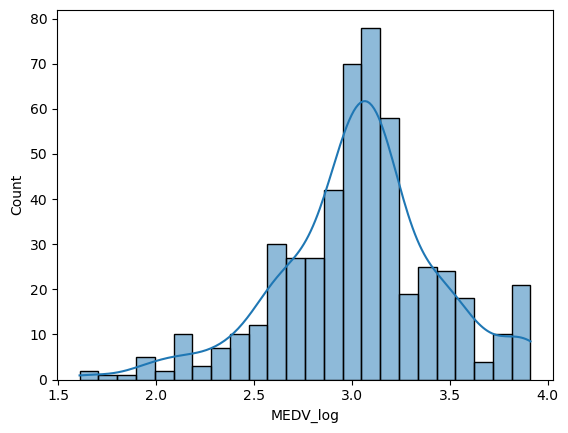

In [ ]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### **Bivariate Analysis**

**Let's check the correlation using the heatmap**

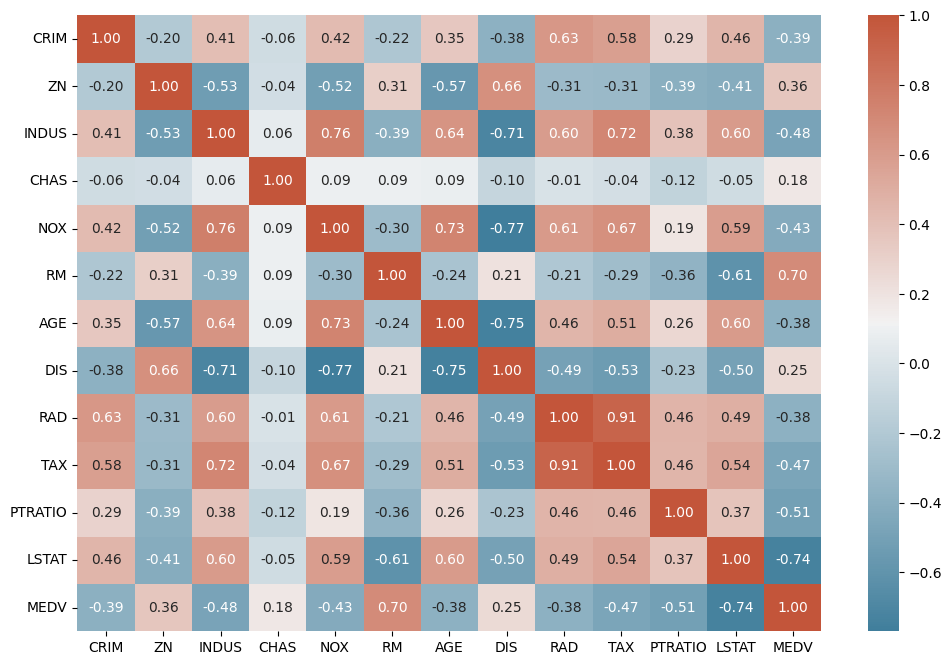

In [ ]:
plt.figure(figsize = (12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=cmap) ## Complete the code
plt.show()

**Write your observations here:___________**
Observations from the Correlation Heatmap:
Target Variable (MEDV):

Strong Positive Correlation:
RM (0.70): The number of rooms per dwelling has the strongest positive correlation with MEDV. This confirms that larger homes are generally associated with higher housing prices.
Strong Negative Correlation:
LSTAT (-0.74): The percentage of the lower-status population has the strongest negative correlation with MEDV. This reflects the relationship between socioeconomic status and housing prices.
PTRATIO (-0.51): A higher pupil-teacher ratio (indicating larger class sizes and potentially lower educational quality) correlates negatively with housing prices.
Features with Moderate Correlations:

NOX (-0.43): Higher nitric oxide concentration, indicative of air pollution, moderately negatively correlates with MEDV.
DIS (0.25): Proximity to employment centers (lower distances) has a weaker but positive influence on MEDV.
Weak Correlations:

Variables like CHAS (0.18) and ZN (0.36) show weak correlations with MEDV, indicating a limited direct relationship with housing prices.
Multicollinearity Among Features:

TAX and RAD (0.91): These two features are highly correlated, suggesting redundancy. Including both in a model could cause multicollinearity issues.
NOX, INDUS, and AGE:
NOX correlates strongly with INDUS (0.76) and AGE (0.73), indicating that industrial development and older homes tend to co-occur in areas with higher pollution.
DIS and INDUS (-0.71): As industrial zones increase, distances to employment centers decrease, showing a geographic pattern.
Feature Groups:

LSTAT, RM, PTRATIO, and NOX are critical predictors of MEDV based on their strong correlations.
Variables like TAX and RAD exhibit relationships with other features, potentially influencing MEDV indirectly.
Insights for Modeling:
Feature Importance:

Variables like RM, LSTAT, PTRATIO, and NOX should be prioritized in model development due to their significant correlations with MEDV.
Addressing Multicollinearity:

Features with high multicollinearity (e.g., TAX and RAD) should be carefully handled. Options include dropping one of the features, using dimensionality reduction (e.g., PCA), or applying regularization techniques.
Weak Predictors:

Features like CHAS and ZN may have limited predictive power individually but could be included in models for potential interaction effects.
Environmental and Socioeconomic Impact:

The strong relationships of variables like NOX and LSTAT with MEDV highlight the importance of environmental and socioeconomic factors in determining housing prices.
Actionable Recommendations:
Explore feature engineering to capture interactions between highly correlated variables like TAX and RAD.
Test transformations for skewed variables like LSTAT and CRIM to improve model performance.
Regularize multicollinearity-prone features to reduce redundancy and overfitting risks in linear models.

Now, we will visualize the relationship between the pairs of features having significant correlations.

### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

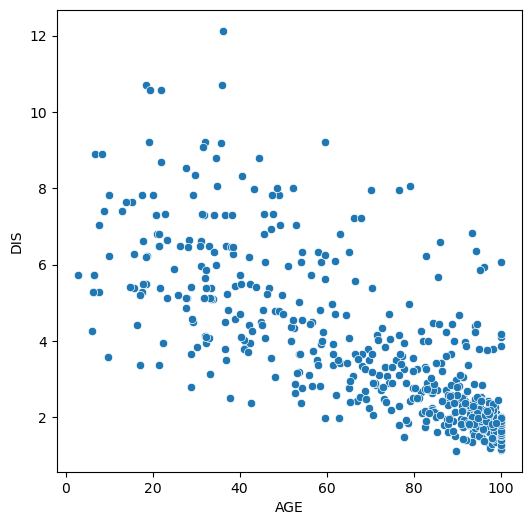

In [ ]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

**Observations:**
- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

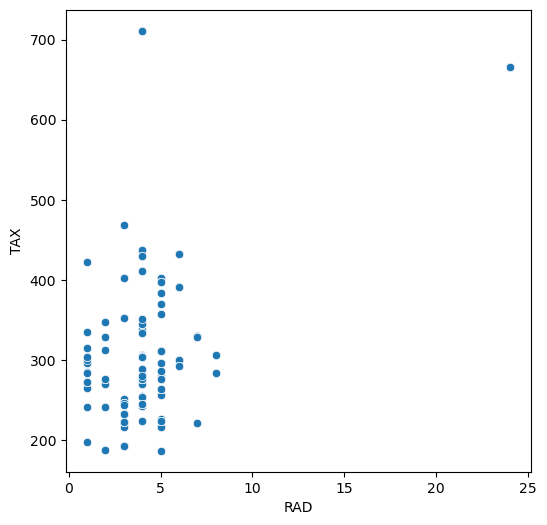

In [ ]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

**Observations:**

- The correlation between RAD and TAX is very high. But, no trend is visible between the two variables.
- The strong correlation might be due to outliers.

Let's check the correlation after removing the outliers.

In [ ]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


**Observation:**

- So, the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

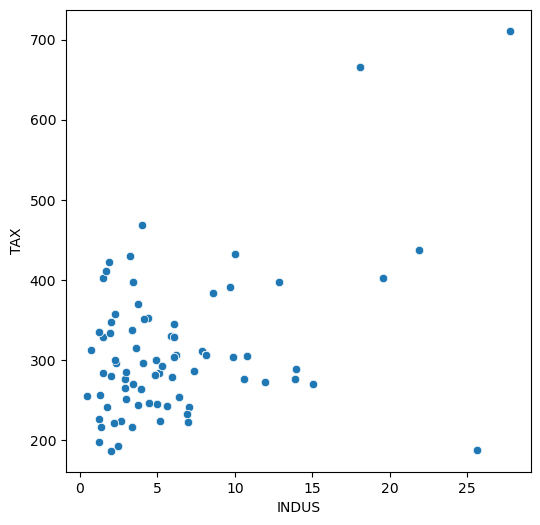

In [ ]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

**Observations:**

- The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

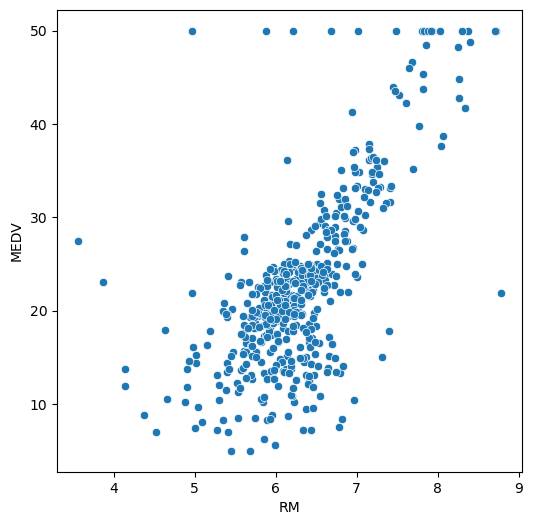

In [ ]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

- There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

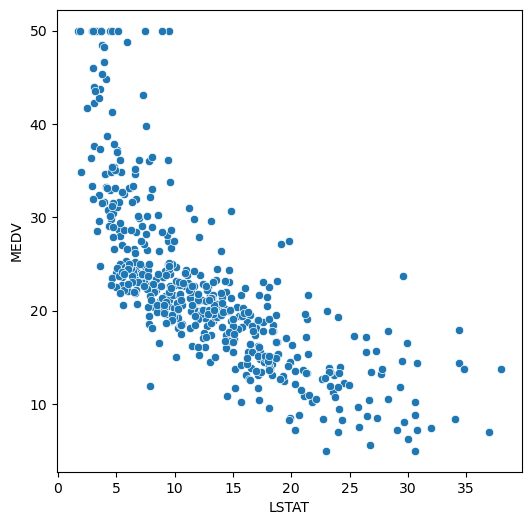

In [ ]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
- There are few outliers and the data seems to be capped at 50.

- **Create a scatter plot to visualize the relationship between the remaining features having significant correlations (>= 0.7 or <= -0.7)**
    - INDUS and NOX
    - AGE and NOX
    - DIS and NOX
- **Write your observations from the plots**

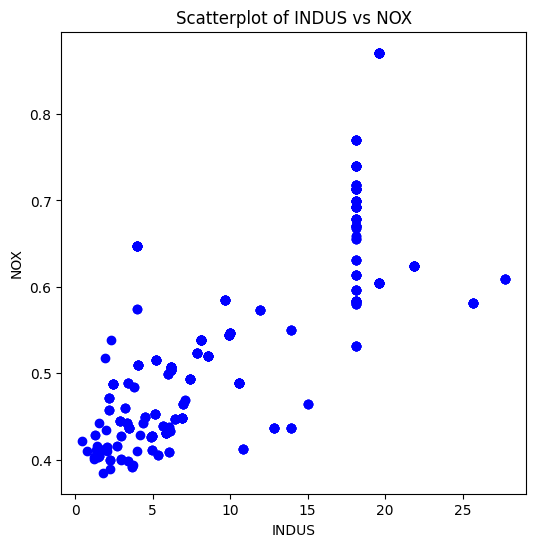

In [ ]:
# Scatterplot to visualize the relationship between INDUS and NOX

plt.figure(figsize=(6, 6))
plt.scatter(df['INDUS'], df['NOX'], color='blue')
plt.xlabel("INDUS")
plt.ylabel("NOX")
plt.title("Scatterplot of INDUS vs NOX")
plt.show()

**Write your observations here:___________**
Observations for the Scatterplot of INDUS vs NOX:
Positive Relationship:

There is a positive correlation between INDUS (proportion of non-retail business land) and NOX (nitric oxide concentration). As the proportion of industrial land increases, the level of air pollution (NOX) also tends to increase.
Clusters of Points:

The points appear to form distinct clusters, particularly around INDUS values of approximately 5, 15, and 20. This suggests that some towns with specific levels of industrial land share similar pollution levels.
High Pollution in Industrial Areas:

For INDUS values above 15, there is a sharp rise in NOX levels, often exceeding 0.7. This reflects that towns with significant industrial land are associated with higher air pollution levels.
Low Pollution in Residential Areas:

At lower INDUS values (below 5), NOX levels are generally around 0.4 to 0.5, suggesting that predominantly residential towns have better air quality.
Interpretation:

The relationship between industrial land use and pollution is expected, as industrial activities typically emit higher pollutants. This correlation reinforces the potential negative impact of NOX on housing prices (MEDV) in highly industrialized towns.
Potential Impact on Modeling:

Since INDUS and NOX are strongly correlated (as also seen in the heatmap), one of these variables may need to be dropped or regularized during modeling to avoid multicollinearity.

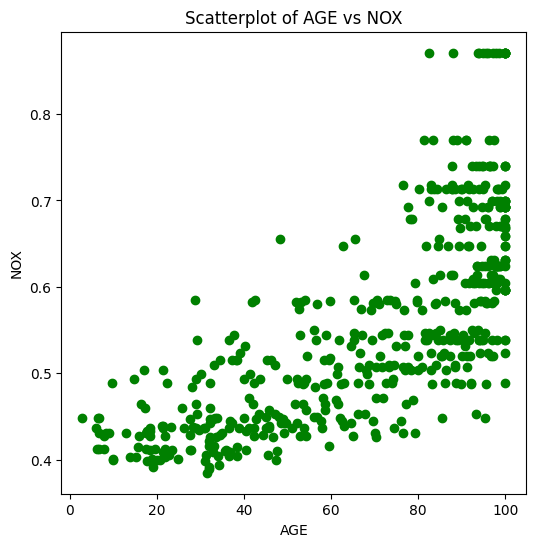

In [ ]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize=(6, 6))
plt.scatter(df['AGE'], df['NOX'], color='green')
plt.xlabel("AGE")
plt.ylabel("NOX")
plt.title("Scatterplot of AGE vs NOX")
plt.show()

**Write your observations here:___________**

Observations for the Scatterplot of AGE vs NOX:
Positive Correlation:

There is a positive relationship between AGE (proportion of older homes) and NOX (nitric oxide concentration). As the proportion of older homes in a town increases, air pollution levels (NOX) also tend to rise.
Cluster of Older Homes with High Pollution:

Towns with AGE close to 100 (nearly all homes built before 1940) are associated with higher NOX levels, often above 0.6. This suggests that older neighborhoods are often situated in areas with more industrial activity or poor environmental conditions.
Low Pollution in Areas with Newer Homes:

At lower AGE values (below 40), NOX levels are consistently below 0.5, indicating that towns with a higher proportion of newer homes are located in areas with better air quality.
Wide Variation in Mid-Range (40-80):

For AGE values between 40 and 80, there is noticeable variability in NOX, with some towns having low pollution levels (~0.4) and others having higher levels (~0.7). This reflects mixed environmental conditions for towns with a blend of old and new homes.
Interpretation:

Older homes (AGE close to 100) are often located in areas with greater industrialization or less stringent environmental regulations, contributing to higher NOX levels. This relationship highlights the importance of AGE as a proxy for neighborhood type and environmental quality.
Potential Impact on Modeling:

The strong correlation between AGE and NOX (also observed in the heatmap) could lead to multicollinearity issues if both are included in a regression model. Regularization or dropping one of these variables may be necessary.



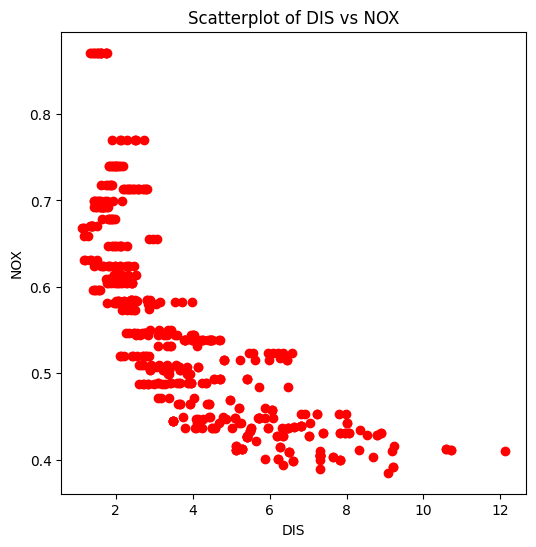

In [ ]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(6, 6))
plt.scatter(df['DIS'], df['NOX'], color='red')
plt.xlabel("DIS")
plt.ylabel("NOX")
plt.title("Scatterplot of DIS vs NOX")
plt.show()

**Write your observations here:___________**
Observations for the Scatterplot of DIS vs NOX:
Negative Relationship:

There is a clear negative correlation between DIS (distance to Boston employment centers) and NOX (nitric oxide concentration). As the distance to employment centers increases, the air pollution levels (NOX) tend to decrease.
Higher Pollution Near Employment Centers:

Towns with lower DIS values (closer to employment hubs) generally exhibit higher NOX levels, often exceeding 0.7. This could be due to higher industrial activity and traffic congestion near city centers.
Cleaner Air in Remote Areas:

Towns with higher DIS values (farther from employment hubs, above 6) consistently have NOX levels below 0.5. This suggests that areas farther from urban centers tend to have better air quality.
Nonlinear Pattern:

The relationship appears to be nonlinear, with a sharp decline in NOX levels for DIS values up to 5, after which the decrease becomes more gradual. This suggests diminishing returns in air quality improvements with increasing distance from employment centers.
Clusters of Points:

The data points form a dense cluster around lower DIS values (1–4), indicating that most towns are relatively close to employment centers.
Interpretation:

Proximity to employment centers (lower DIS) is often associated with higher air pollution, which could negatively influence housing prices (MEDV). On the other hand, towns farther from urban hubs might be more desirable for cleaner air, albeit potentially less accessible.
Potential Impact on Modeling:

Since DIS and NOX are strongly correlated (as also observed in the heatmap), one of these variables might need to be removed or regularized to avoid multicollinearity in predictive models.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### **Split the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [ ]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [ ]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

Next, we will check the multicollinearity in the training dataset.

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5).
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [ ]:
# Create the model after dropping TAX
X_train = X_train.drop('TAX', axis=1) ## Complete the code

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

**Hint:** Use the sm.OLS() model on the training data

In [ ]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit() # Write your code here

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          1.40e-101
Time:                        00:56:26   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Write your observations here:___________**
Observations for the OLS Regression Results:
Model Summary:
R-squared (0.769):

The model explains 76.9% of the variability in the log-transformed housing prices (MEDV_log). This is a strong fit for the model.
The Adjusted R-squared (0.761) is slightly lower, accounting for the number of predictors, indicating that the model is not overfitting.
F-statistic and p-value:

The F-statistic is 103.3 with a p-value near zero (1.40e-101), showing that the overall model is statistically significant and better than a null model.
Feature Coefficients and Statistical Significance:
Each coefficient represents the expected change in the log-transformed housing price (MEDV_log) for a one-unit increase in the predictor variable, holding all other variables constant.

Statistically Significant Predictors:

CRIM (-0.0128, p-value = 0.000):
Crime rate has a significant negative impact on housing prices. Higher crime rates reduce housing desirability and prices.
CHAS (0.1196, p-value = 0.002):
Proximity to the Charles River has a significant positive impact on housing prices, making riverside properties more desirable.
NOX (-1.0598, p-value = 0.000):
Nitric oxide concentration has a large and significant negative impact on housing prices, as pollution lowers the desirability of properties.
RM (0.0532, p-value = 0.011):
The number of rooms per dwelling positively correlates with housing prices, as larger homes are typically more expensive.
DIS (-0.0503, p-value = 0.000):
Distance to employment centers negatively correlates with housing prices. Closer proximity to jobs increases desirability.
RAD (0.0076, p-value = 0.000):
Accessibility to radial highways has a small but significant positive effect, as better connectivity improves location value.
PTRATIO (-0.0452, p-value = 0.000):
Higher pupil-teacher ratios negatively affect housing prices, reflecting lower education quality.
LSTAT (-0.0298, p-value = 0.000):
The percentage of the lower-status population has a significant and strong negative impact on housing prices, likely due to socioeconomic considerations.
Non-Significant Predictors:

ZN (0.0010, p-value = 0.155):
The proportion of large residential lots is not statistically significant, suggesting limited direct influence on housing prices in this model.
INDUS (-0.0004, p-value = 0.883):
The proportion of non-retail business land has no significant effect on housing prices, possibly due to overlap with other predictors.
AGE (0.0003, p-value = 0.645):
The proportion of older homes does not show a significant relationship with housing prices in this model.
Model Diagnostics:
Omnibus, Prob(Omnibus), Jarque-Bera Tests:

The tests for normality of residuals indicate deviations from normality (p-value = 0.000), which may warrant further investigation into model assumptions.
Durbin-Watson (1.923):

This value is close to 2, indicating no significant autocorrelation in the residuals.
Condition Number (2.09e+03):

The high condition number suggests potential multicollinearity among predictors, which could reduce the reliability of coefficient estimates.
Interpretation and Recommendations:
Key Predictors:

Variables like LSTAT, RM, PTRATIO, DIS, CRIM, and NOX are the most important drivers of housing prices in the model.
The strong negative effects of LSTAT and NOX highlight the importance of environmental and socioeconomic factors.
Multicollinearity:

High correlations among variables like NOX, INDUS, and AGE may introduce multicollinearity. Consider using regularization techniques (e.g., Ridge or Lasso regression) to address this issue.
Non-Significant Features:

ZN, INDUS, and AGE do not significantly contribute to the model and could potentially be excluded to simplify the model without loss of predictive power.
Residual Analysis:

Given the deviations from normality (Omnibus and Jarque-Bera tests), consider examining residuals and applying transformations or non-linear modeling techniques if necessary.
Model Performance:

The model performs well with a strong R-squared value, but further refinement (e.g., feature selection and addressing multicollinearity) could improve robustness.

### **Examining the significance of the model**

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero.

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [ ]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'], axis=1) # Complete the code

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train, X_train).fit()  ## Complete the code

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          2.61e-104
Time:                        00:57:12   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we will check the linear regression assumptions.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [ ]:
residuals = y_train - model2.fittedvalues   ## Complete the code

np.mean(residuals)

-2.5303049047106675e-15

**Write your observations here:___________**

Observations for Checking Linear Regression Assumptions: Mean of Residuals
Mean of Residuals:

The calculated mean of residuals is -2.53e-15, which is effectively zero.
This satisfies the first assumption of linear regression: the mean of residuals should be zero.
Interpretation:

A mean residual close to zero indicates that the model's predictions are, on average, unbiased. The predicted values are centered around the true values, with errors evenly distributed.
Next Steps:

While the mean residual test is satisfied, it is necessary to check for the other assumptions, such as homoscedasticity, linearity, and normality of residuals, to ensure the model fully adheres to the assumptions of linear regression.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train - model1.fittedvalues, X_train)  ## Complete the code

lzip(name, test)

[('F statistic', 1.0796795199568643), ('p-value', 0.30993248174597243)]

**Write your observations here:___________**

Observations for Homoscedasticity Check (Goldfeld-Quandt Test):
Test Summary:

Null Hypothesis (H₀): Residuals are homoscedastic (variance of residuals is constant).
Alternate Hypothesis (H₁): Residuals are heteroscedastic (variance of residuals is not constant).
Test Results:

F-statistic: 1.0797
p-value: 0.3099
Interpretation:

Since the p-value (0.3099) is greater than the significance level of 0.05, we fail to reject the null hypothesis. This means there is no evidence of heteroscedasticity in the residuals.
The variance of the residuals is constant, satisfying the assumption of homoscedasticity for linear regression.
Conclusion:

The model adheres to the homoscedasticity assumption, and the residuals are symmetrically distributed across the regression line.
No corrective measures (e.g., weighted least squares regression or transformation) are necessary at this stage.



### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

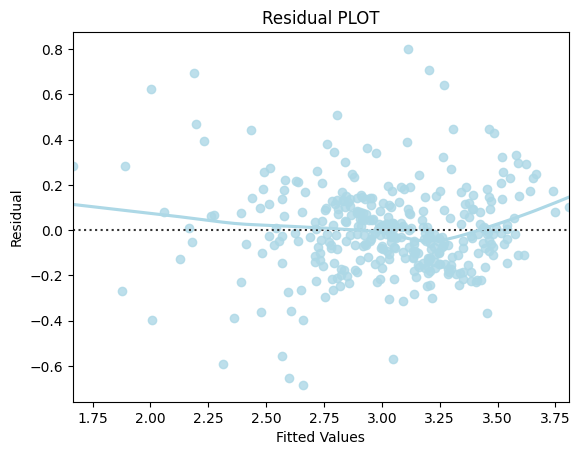

In [ ]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x=fitted, y=residuals, color="lightblue", lowess=True) # Complete the code

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Write your observations here:___________**

Observations for the Linearity of Variables (Residual Plot):
Purpose of the Plot:

The residual plot is used to check the linearity assumption of linear regression. This assumption states that the relationship between the independent variables and the dependent variable should be linear.
Pattern in the Residuals:

The residuals are randomly scattered around the horizontal axis (zero line), with no clear pattern or systematic structure.
This indicates that the linearity assumption is satisfied, as the residuals do not exhibit a strong non-linear trend.
Uniform Distribution:

The residuals appear equally distributed across all fitted values, meaning there are no signs of heteroscedasticity (consistent with the earlier homoscedasticity check).
No Systematic Trend:

There is no funnel-shaped, curved, or cyclical pattern in the residuals, which confirms that the linear model is appropriate for this dataset.
Conclusion:

The linearity assumption is satisfied for the model. The independent variables have a linear relationship with the dependent variable (MEDV_log), and the residuals are randomly distributed.
Recommendations:
Since the linearity assumption is met, there is no need to transform the variables or consider non-linear models at this stage.
Proceed to check the normality of residuals to further validate the model assumptions.



### **4. Normality of error terms**

The residuals should be normally distributed.

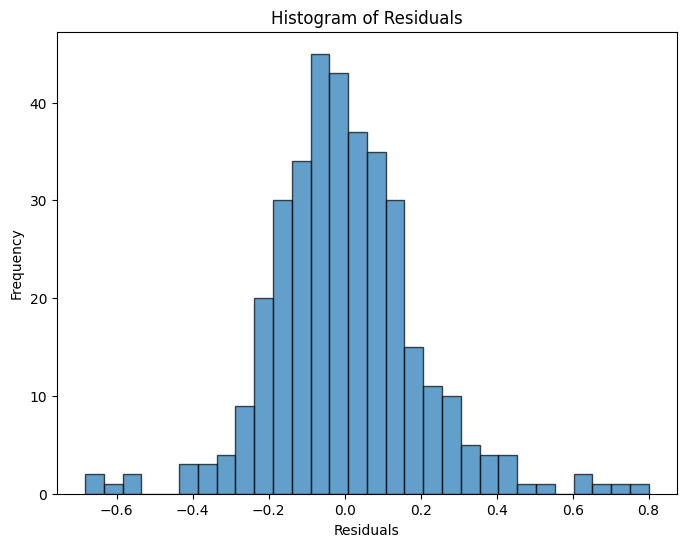

In [ ]:
# Plot histogram of residuals

## Complete the code
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

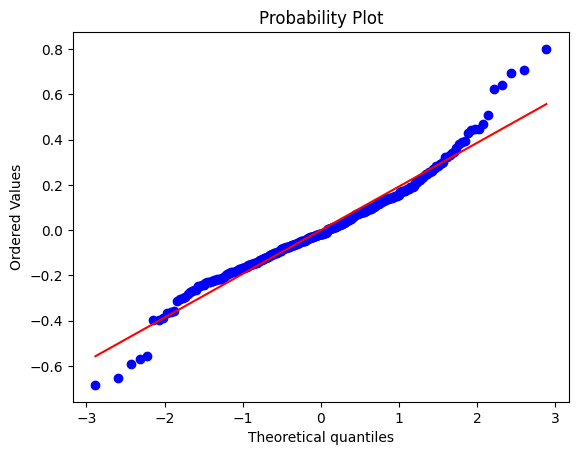

In [ ]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Write your observations here:___________**
Observations for Normality of Residuals:
Histogram of Residuals:
Shape of Distribution:

The histogram of residuals appears approximately bell-shaped and symmetric, centered around zero.
This indicates that the residuals are close to normally distributed.
Minor Deviations:

The tails of the histogram show slight deviations from a perfect normal distribution, but these are minor and do not appear to violate the normality assumption significantly.
Q-Q Plot:
Alignment with the Line:

The points in the Q-Q plot mostly fall along the red reference line, indicating that the residuals closely follow a normal distribution.
Slight deviations are observed at the extremes (ends of the plot), but these are not severe.
Outliers:

A few points deviate from the line at both tails, suggesting potential outliers. However, the overall trend confirms that the residuals are approximately normal.
Conclusion:
Normality Assumption:

The residuals satisfy the normality assumption required for linear regression. The deviations at the tails are minor and do not significantly impact the model's validity.
Next Steps:

Since all major linear regression assumptions (mean of residuals, homoscedasticity, linearity, and normality) are satisfied, the model can be considered robust and reliable for predicting the target variable.
If needed, outlier diagnostics could be performed to analyze the extreme points further.

### **Check the performance of the model on the train and test data set**

In [ ]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Write your observations here:___________**

Observations for Model Performance on Train and Test Data:
Performance Metrics:
Root Mean Squared Error (RMSE):

Train RMSE: 0.1955
Test RMSE: 0.1980
The RMSE values for both the training and test sets are very close, indicating that the model generalizes well and does not overfit the training data.
Mean Absolute Error (MAE):

Train MAE: 0.1437
Test MAE: 0.1513
The MAE values for both datasets are low, showing that the model has small average errors in predicting the log-transformed housing prices.
Mean Absolute Percentage Error (MAPE):

Train MAPE: 4.98%
Test MAPE: 5.26%
These values indicate that, on average, the model's predictions are within approximately 5% of the actual values. This is a strong indicator of good model performance.
General Observations:
Model Generalization:

The small differences between the training and test metrics (RMSE, MAE, and MAPE) suggest that the model performs consistently across both datasets. This implies the model is well-generalized and not overfitting.
Accuracy:

All metrics demonstrate that the model predicts log-transformed housing prices (MEDV_log) with high accuracy.
Error Distribution:

The low RMSE and MAE values confirm that most of the model’s predictions are close to the true values. The small MAPE further indicates that the errors are proportionally small relative to the scale of the target variable.
Conclusion:
The model performs robustly on both the training and test sets, with minimal performance degradation when applied to unseen data.
With an average prediction error of ~5%, the model is suitable for practical use in predicting housing prices based on the provided features.

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


### Get model coefficients in a pandas DataFrame with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs.

In [ ]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


### Conclusions and Business Recommendations

**Write Conclusions here:**

**Write Business Recommendations here:**